In [13]:
# Lab 10-Clustering

# Learning Outcomes
# By the end of this lab, students will be able to:
# Apply K-Means clustering (choose k with elbow)
# Apply Hierarchical clustering + dendrograms
# Evaluate with silhouette score.
# P — Project
# Download the “FreqEmo Twitter Dataset”
# https://www.kaggle.com/datasets/anshika1011/freqemo-twitterdataset
# Within the file “Complete Dataset”, use columns total tweets – most 7 (17 features).
# Apply K-Means clustering (choose k with elbow) taking the 17 features.
# Hierarchical clustering + dendrograms with 17 features.
# Evaluate with silhouette score for both k-means and hierarchical methods.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
import os 

sns.set(style='whitegrid')

# Load Data
try:
    data = pd.read_csv('CompleteDataset.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'CompleteDataset.csv' not found.")
    print("Please make sure the dataset is in the 'freqemo-twitterdataset' folder.")
    exit()

# Define Features (FIXED)
feature_columns = [
    'anger', 'anticip', 'disgust', 'fear', 'joy', 'sad', 'sur', 'trust',
    'n', 'p',
    'most 1', 'most 2', 'most 3', 'most 4', 'most 5', 'most 6', 'most 7'
]
print(f"Using {len(feature_columns)} features for clustering.")

Dataset loaded successfully.
Using 17 features for clustering.


In [15]:
# Select Features
X = data[feature_columns].copy() 
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')
X = X.fillna(0)

# Scale Data
print("Scaling data...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"Data scaled. Shape of scaled data: {X_scaled.shape}")

Scaling data...
Data scaled. Shape of scaled data: (655, 17)


Calculating WCSS for k=1 to 10...


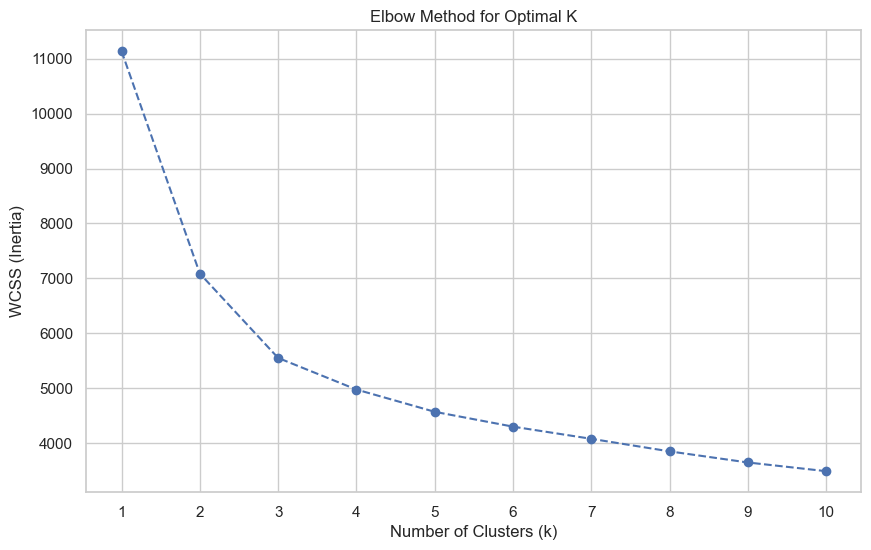

Applying K-Means with k=6...
K-Means clustering complete.


In [16]:
# Find Optimal K
wcss = []
k_range = range(1, 11)

print("Calculating WCSS for k=1 to 10...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_range)
plt.show()

# Apply K Means
optimal_k = 6
print(f"Applying K-Means with k={optimal_k}...")

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
print("K-Means clustering complete.")

Creating dendrogram


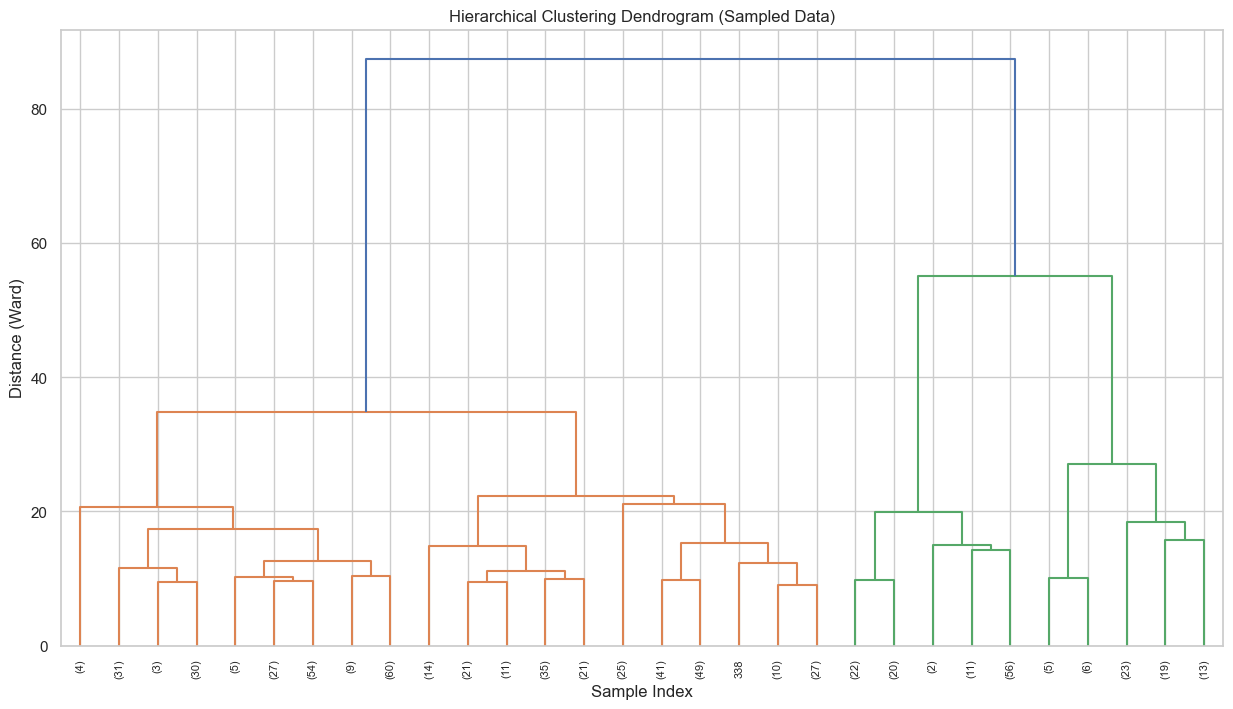

Applying Agglomerative Clustering with n=6...
Hierarchical clustering complete.


In [17]:
# Plot Dendrogram
print("Creating dendrogram")
np.random.seed(42)
sample_indices = np.random.choice(X_scaled.shape[0], 655, replace=False)
X_sample = X_scaled[sample_indices]

Z = sch.linkage(X_sample, method='ward')

plt.figure(figsize=(15, 8))
plt.title('Hierarchical Clustering Dendrogram (Sampled Data)')
plt.xlabel('Sample Index')
plt.ylabel('Distance (Ward)')
sch.dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
    truncate_mode='lastp',
    p=30
)
plt.show()

# Apply Hierarchical Clustering
hc_clusters = optimal_k 
print(f"Applying Agglomerative Clustering with n={hc_clusters}...")

hc = AgglomerativeClustering(n_clusters=hc_clusters, linkage='ward')
hc_labels = hc.fit_predict(X_scaled)
print("Hierarchical clustering complete.")

In [18]:
# Evaluate Models
print("Calculating Silhouette Scores...")
score_sample_size = 655
np.random.seed(42)
sample_indices_eval = np.random.choice(X_scaled.shape[0], score_sample_size, replace=False)

X_eval = X_scaled[sample_indices_eval]
kmeans_labels_eval = kmeans_labels[sample_indices_eval]
hc_labels_eval = hc_labels[sample_indices_eval]

# K Means Score
kmeans_silhouette = silhouette_score(X_eval, kmeans_labels_eval)
print(f"\nK-Means Silhouette Score (k={optimal_k}): {kmeans_silhouette:.4f}")

# Hierarchical Score
hc_silhouette = silhouette_score(X_eval, hc_labels_eval)
print(f"Hierarchical Silhouette Score (n={hc_clusters}): {hc_silhouette:.4f}")

Calculating Silhouette Scores...

K-Means Silhouette Score (k=6): 0.1692
Hierarchical Silhouette Score (n=6): 0.1446
